In [1]:
# Hello, This is my First Capstone Project named 911 Calls
# To start this project I should import some libraries in oreder not to face up to difficulties
# START
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
import cufflinks as cf

In [6]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [7]:
init_notebook_mode(connected=True)

In [8]:
cf.go_offline()

# I have imported all the things I need, now I can start

In [9]:
# Firstly, I will read my csv file with pandas and name it as df
df = pd.read_csv('911.csv')

In [10]:
# Now check out the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109999 entries, 0 to 109998
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        109999 non-null  float64
 1   lng        109999 non-null  float64
 2   desc       109999 non-null  object 
 3   zip        96235 non-null   float64
 4   title      109999 non-null  object 
 5   timeStamp  109999 non-null  object 
 6   twp        109966 non-null  object 
 7   addr       109999 non-null  object 
 8   e          109999 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [11]:
# I should read head of my csv file in order to know that I have read it as df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
# In the code below I read 5 zip codes that are common
df['zip'].value_counts().head(5)

19401.0    7713
19464.0    7393
19403.0    5392
19446.0    5263
19406.0    3546
Name: zip, dtype: int64

In [13]:
# I also read 5 common townships
df['twp'].value_counts().head(5)

LOWER MERION    9421
ABINGTON        6634
NORRISTOWN      6494
UPPER MERION    5762
CHELTENHAM      5083
Name: twp, dtype: int64

In [14]:
# You can see in the code below that I checked how many unique titles are there in df
df['title'].nunique()

115

In [15]:
# Now I should create new column named Reason and this column contains the part of column title, for example:
# in the location 0 of the column title you can see EMS:BACK PAIN/INJURY, I should take EMS from this string
# and put it into Reason column
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [16]:
# Let's check if my code worked
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [17]:
# Ok, Reason column has created, now let's check if it is loacted in our df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [18]:
# Now Let's check out common reasons based of Reason column
df['Reason'].value_counts()

EMS        54469
Traffic    38960
Fire       16570
Name: Reason, dtype: int64

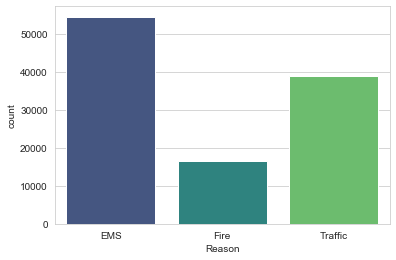

In [19]:
# Now I will use seaborn to make a plot of this column
sns.set_style('whitegrid')
sns.countplot(x=df['Reason'],data=df,palette='viridis')

In [20]:
# In the graph you can see that EMS reason is the most common
# Comparing them by using their graph is very amazing, isn't it?

In [21]:
# It's time to work with time informations
# At first, let's check datatype of timeStamp column
type(df['timeStamp'].iloc[0])

str

In [22]:
# You saw that datatype of timeStamp is string
# Now, I should change its datatype into timestamp
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [23]:
# I have changed it, now Let's check

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
# Ok, timeStamp column has changed
# Let's Continue

In [26]:
# And now, I'm gonna create 3 new columns: Hour, Month and Day of Week
# Let's do it and check in the end

In [27]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [28]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [29]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [31]:
# You can see that now there are 3 new columns in my dataframe

In [32]:
# Now I should change whole Day of Week column, because I want them to be string
dmap = {0:'Mon',1:'Tue',2:'Wen',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [33]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [34]:
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
109994    Thu
109995    Thu
109996    Thu
109997    Thu
109998    Thu
Name: Day of Week, Length: 109999, dtype: object

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


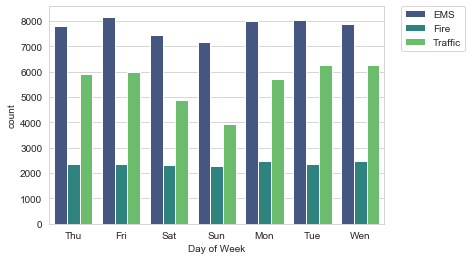

In [36]:
sns.countplot(x=df['Day of Week'],data=df,hue=df['Reason'],palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

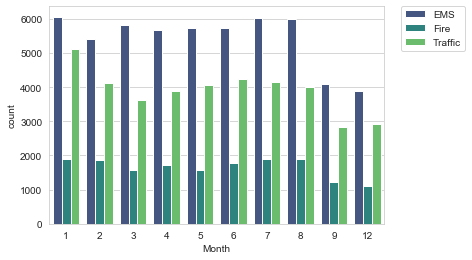

In [37]:
sns.countplot(x=df['Month'],data=df,hue=df['Reason'],palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [38]:
byMonth = df.groupby('Month').count()

In [39]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13096,13096,13096,11512,13096,13096,13094,13096,13096,13096,13096,13096
2,11396,11396,11396,9926,11396,11396,11395,11396,11396,11396,11396,11396
3,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
4,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
5,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374
6,11732,11732,11732,10205,11732,11732,11726,11732,11732,11732,11732,11732
7,12088,12088,12088,10626,12088,12088,12086,12088,12088,12088,12088,12088
8,11904,11904,11904,10381,11904,11904,11902,11904,11904,11904,11904,11904
9,8147,8147,8147,7094,8147,8147,8145,8147,8147,8147,8147,8147


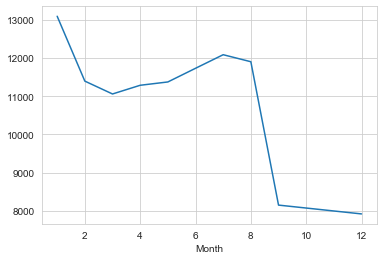

In [40]:
byMonth['lat'].plot()

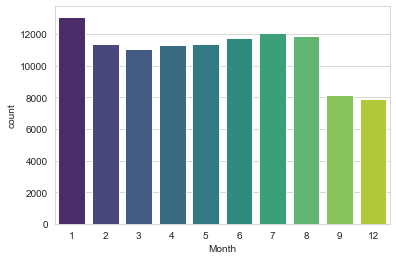

In [41]:
sns.countplot(x=df['Month'],data=df,palette='viridis')

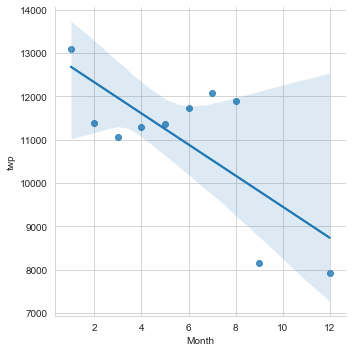

In [42]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [43]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [46]:
byDate = df.groupby('Date').count()

In [47]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


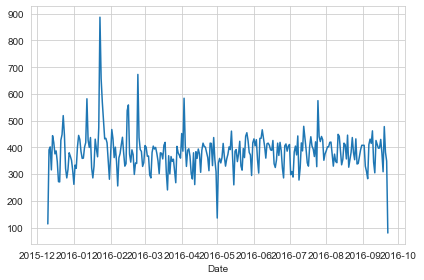

In [48]:
byDate['lat'].plot()
plt.tight_layout()

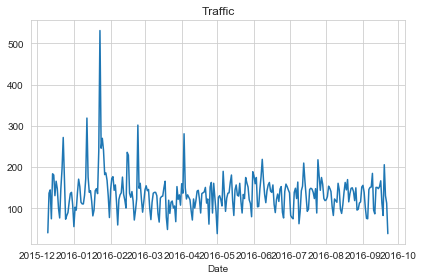

In [49]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

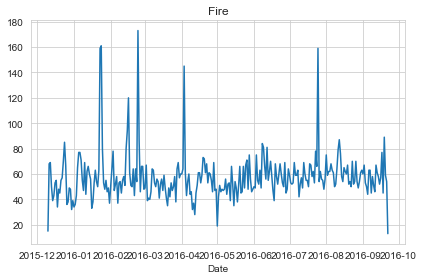

In [50]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

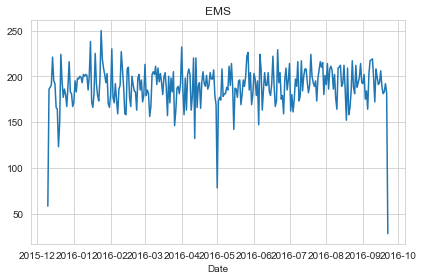

In [51]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [52]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [53]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,303,256,210,207,219,237,415,705,813,853,...,1031,1094,1152,1064,856,797,718,638,585,500
Mon,316,244,235,199,230,298,452,756,915,887,...,954,1040,1049,1070,951,799,680,535,515,350
Sat,400,338,288,291,254,261,295,436,522,709,...,861,873,896,846,813,791,672,615,547,500
Sun,401,350,319,303,254,270,327,443,532,682,...,751,736,745,783,746,731,570,515,432,383
Thu,299,224,252,178,198,243,425,698,911,945,...,971,1054,1008,1133,911,758,677,605,456,382
Tue,294,258,207,178,227,279,471,744,975,930,...,1052,1045,1135,1120,959,779,715,618,475,323
Wen,277,246,203,234,169,279,477,796,957,899,...,1021,1006,1131,1178,960,754,737,618,518,364


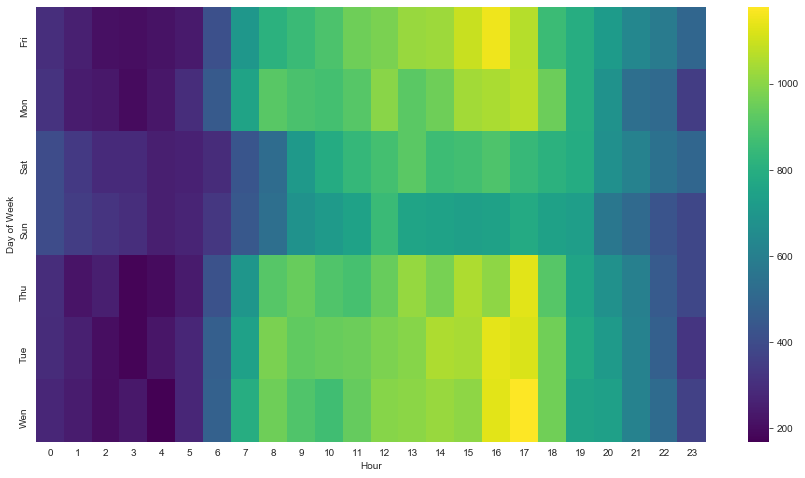

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(dayHour,cmap='viridis')

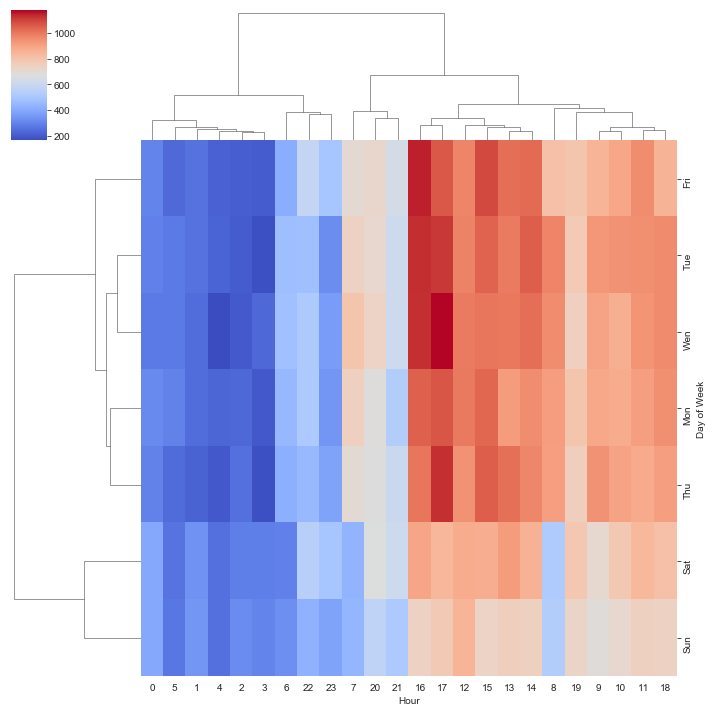

In [55]:
sns.clustermap(dayHour,cmap='coolwarm')

In [56]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

In [57]:
dayMonth

Month,1,2,3,4,5,6,7,8,9,12
Day of Week,,,,,,,,,,
Fri,1950,1564,1521,1949,1725,1647,2042,1740,1300,1058
Mon,1718,1959,1534,1594,1776,1609,1685,1865,1187,1251
Sat,2253,1435,1264,1736,1438,1376,1691,1423,1054,960
Sun,1947,1223,1097,1486,1413,1329,1667,1360,924,904
Thu,1584,1582,1883,1592,1585,2055,1642,1579,1301,1262
Tue,1961,1743,1871,1421,1904,1671,1650,1993,1204,1234
Wen,1683,1890,1889,1509,1533,2045,1711,1944,1177,1247


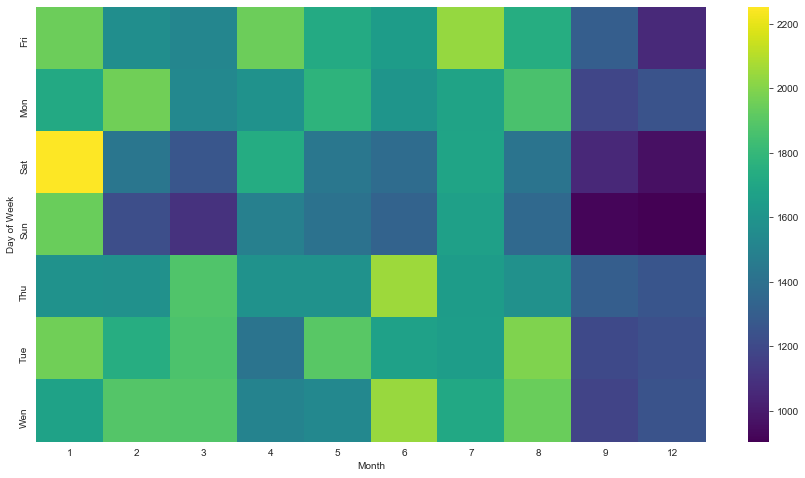

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(dayMonth,cmap='viridis')

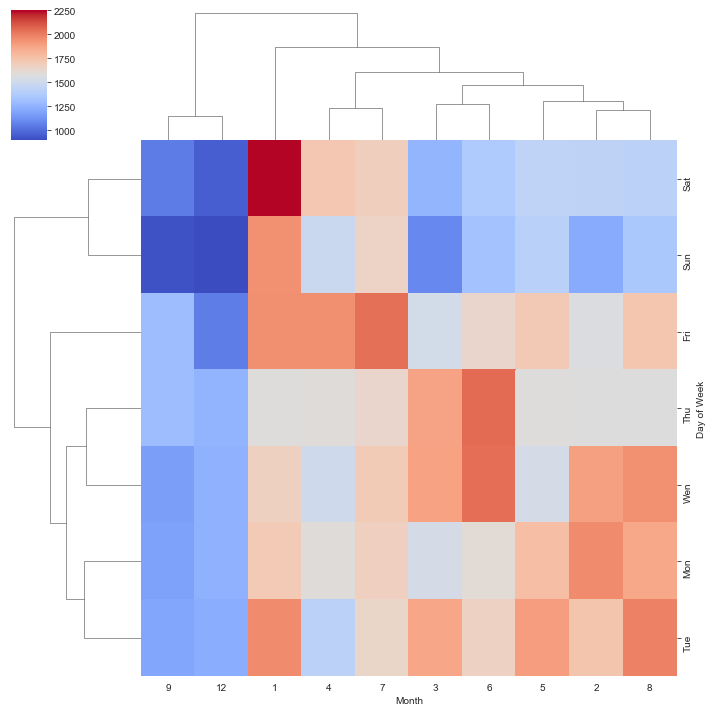

In [59]:
sns.clustermap(dayMonth,cmap='coolwarm')

In [178]:
# FINISH